# Simple Statistical Plots

* Scatter Plots
* Time Series/Line Plots
* Bar Graphs
* Histogram
* Box Plots
* Mosaic Plots

In [2]:
import altair as alt

In [3]:
# Uncomment/run this line to enable Altair in the classic notebook (not JupyterLab)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Example 1 - Motor Trend Cars

In [4]:
from vega_datasets import data
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## Simple Scatter chart

* `mark_point`
* Assign quantitative variables to `x` and `y`

<img src="../images/2_1_simple_scatter.png">

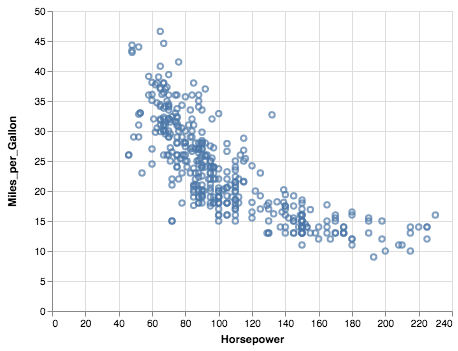

In [5]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
)

## Bubble chart

Adding a encoding for `size` makes a bubble plots

<img src="../images/2_2_bubble.png">

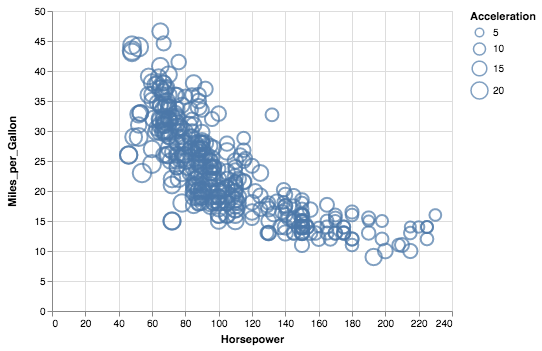

In [7]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    size='Acceleration:Q'
)

# Scatter chart with color and/or shape

We can also map categorical data to `color` and `shape`

<img src="../images/2_3_color_shape.png">

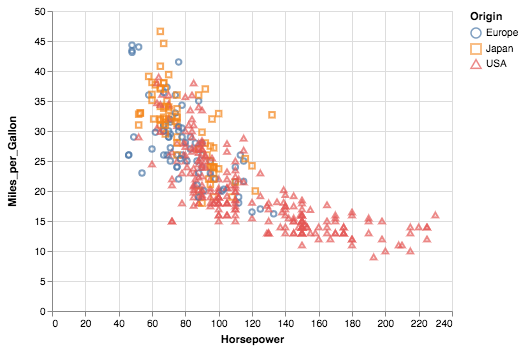

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin',
)

<font color="red"> <h2> Task 1 - Scatterplot</h2> </font> 

Make a scatterplot with the following properties

* `x` is *Displacement*
* `y` is *Miles per Gallon*
* `size` is *Horsepower*
* `color` is *Origin*

## The Grammar of Graphics

The Grammar of Graphics*, Wilkinson (2005) also includes

* Data transformations, and
* Scale tranformation;

which we will illustrate with simple line plots.

## Time Series Data

In [10]:
stocks = data.stocks()
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


## Simple line chart
<img src="../images/2_4_line.png">

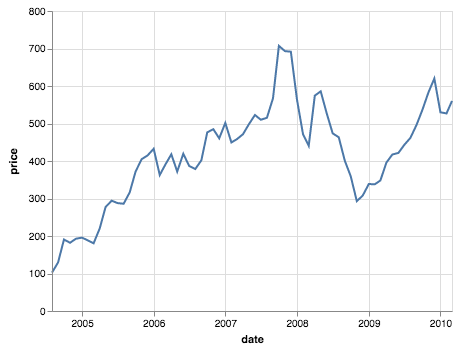

In [11]:
alt.Chart(stocks).mark_line().encode(
    x='date:T',
    y='price:Q'
).transform_filter("datum.symbol == 'GOOG'")

## Filter Transformation

<img src="../images/2_5_datum.png">

<img src="../images/2_6_filter.png">

## Switching to the Log scale

<img src="../images/2_7_scale.png">

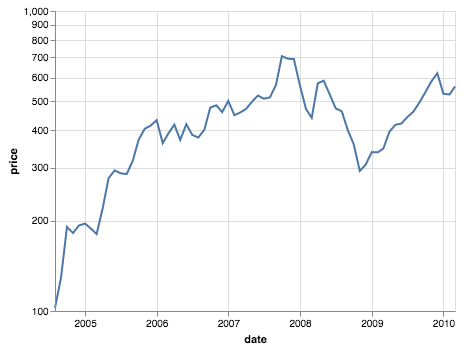

In [12]:
alt.Chart(stocks).mark_line().encode(
    y=alt.Y('price:Q', scale=alt.Scale(type='log')),
    x='date:T',
).transform_filter("datum.symbol == 'GOOG'")

## Grouped line chart

<img src="../images/2_8_split_lines.png">

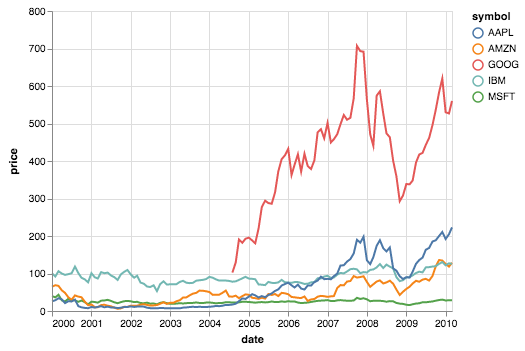

In [13]:
alt.Chart(stocks).mark_line().encode(
    x='date:T',
    y='price',
    color='symbol'
)

<font color="red"> <h2> Task 2 - Line Plots</h2> </font> 

Make a line plot of Amazon stock price after 2005 on the log scale.

## Aggregation

Another data transformation is aggregation, which is needed for 

* Bar Graphs
* Histograms

## Population Data

In [14]:
population = data.population()
population.head()

,age,people,sex,year
0,0,1483789,1,1850
1,0,1450376,2,1850
2,5,1411067,1,1850
3,5,1359668,2,1850
4,10,1260099,1,1850


## Simple Bar Graph

<img src="../images/2_9_bar.png">

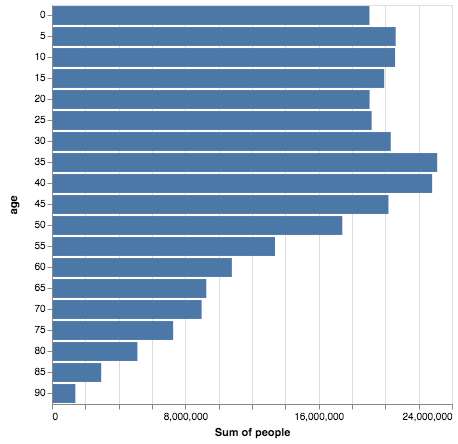

In [15]:
alt.Chart(population).mark_bar().encode(
    x='sum(people)',
    y='age:O'
).transform_filter("datum.year == 2000")

<font color="red"> <h2> Task 3 - Bar Graph</h2> </font> 

Redo the the last plot by 

* Swapping `x` and `y`
* Change the year to 1990

## Stacked Bar Graph

<img src="../images/2_10_stack.png">

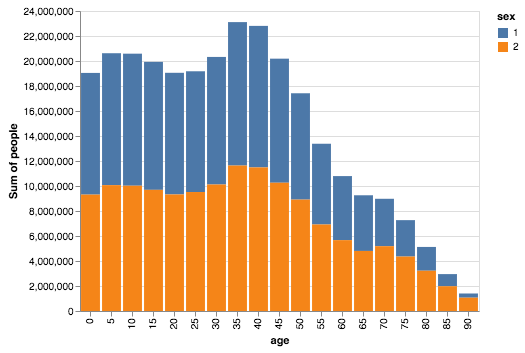

In [18]:
alt.Chart(population).mark_bar().encode(
    x='age:O',
    y='sum(people):Q',
    color='sex:N'
).transform_filter("datum.year == 2000")

## Normalized stacked bar chart
<img src="../images/2_11_normalize.png">

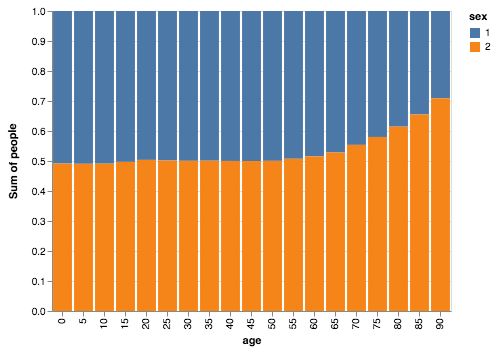

In [23]:
alt.Chart(population).mark_bar().encode(
    x='age:O',
    y=alt.Y('sum(people):Q', stack='normalize'),
    color = 'sex:N'
)

## Histogram

In [27]:
movies = data.movies()
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,12-Jun-98,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,7-Aug-98,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,28-Aug-98,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,11-Sep-98,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,9-Oct-98,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


## Histogram

<img src="../images/2_12_histogram.png">

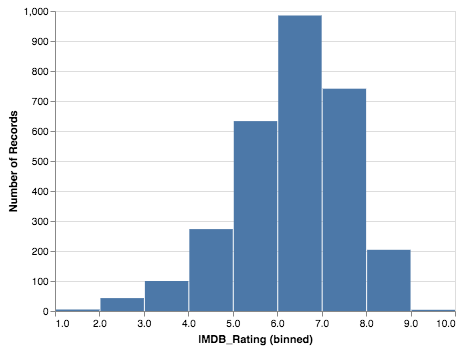

In [28]:
alt.Chart(movies).mark_bar().encode(
    x=alt.X('IMDB_Rating', bin=alt.Bin(maxbins=10)),
    y='count(*):Q',
)

<font color="red"> <h2> Task 4 - Histogram</h2> </font> 

Make a histogram of *Worldwide_Gross*

## The Power of Python

Python functions make it easy to reuse code.

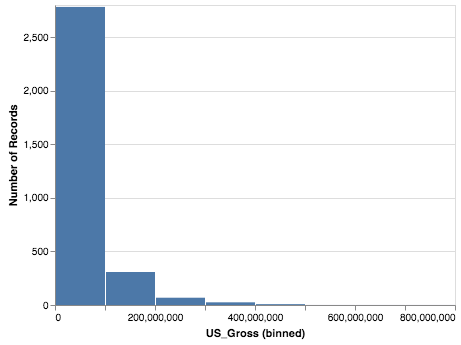

In [37]:
def histogram(data, variable, maxbins=10):
    output = alt.Chart(data).mark_bar().encode(
                x=alt.X(variable + ':Q', bin=alt.Bin(maxbins=10)),
                y='count(*):Q',
            )
    return output

histogram(movies, 'US_Gross')